In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Desafio

A franquia, preocupada com a qualidade dos produtos consumidos pelos seus clientes, uma vez que fora notado um aumento na procura por cereais, deseja saber:

a) se existe um equilíbrio no percentual de caloria adicionado pelos fornecedores e quais são os fornecedores que têm maior percentual de caloria, assim como o menor, relacionado ao tipo; 

b) os níveis de gorduras e açúcar de cada fornecedor.

In [2]:
df = pd.read_csv('Dados/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Soma das calorias por fabricante
calorias_por_fabricante = df.groupby(['mfr', 'type'])['calories'].sum().reset_index()

# Salva o valor de calorias totais em uma variável
calorias_totais = calorias_por_fabricante['calories'].sum()

# Calcula o percentual de calorias por fabricante
calorias_por_fabricante['percentual'] = (calorias_por_fabricante['calories'] / calorias_totais) * 100

# Ordena pelo percentual de calorias
calorias_por_fabricante = calorias_por_fabricante.sort_values('percentual', ascending=False)

(0.0, 35.0)

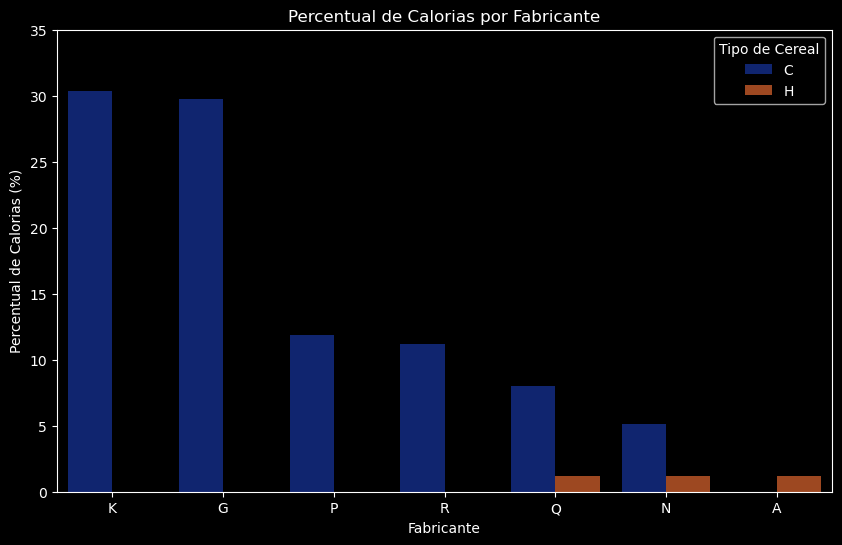

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mfr', y='percentual', data=calorias_por_fabricante, hue='type', palette='dark')
plt.title('Percentual de Calorias por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Percentual de Calorias (%)')
plt.legend(title='Tipo de Cereal')
plt.ylim(0, 35)

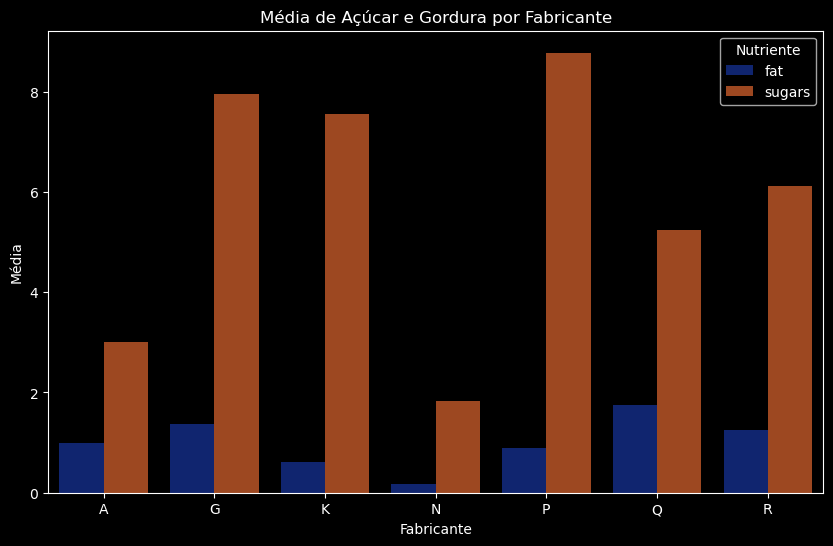

In [9]:
acucar_gordura = df.groupby('mfr')[['fat', 'sugars']].mean().reset_index()

melted = acucar_gordura.melt(id_vars='mfr', value_vars=['fat', 'sugars'], var_name='nutriente', value_name='Media')

plt.figure(figsize=(10, 6))
sns.barplot(x='mfr', y='Media', hue='nutriente', palette='dark', data=melted)
plt.title('Média de Açúcar e Gordura por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Média')
plt.legend(title='Nutriente')

Text(0.5, 1.0, 'Percentual de Calorias por Fabricante')

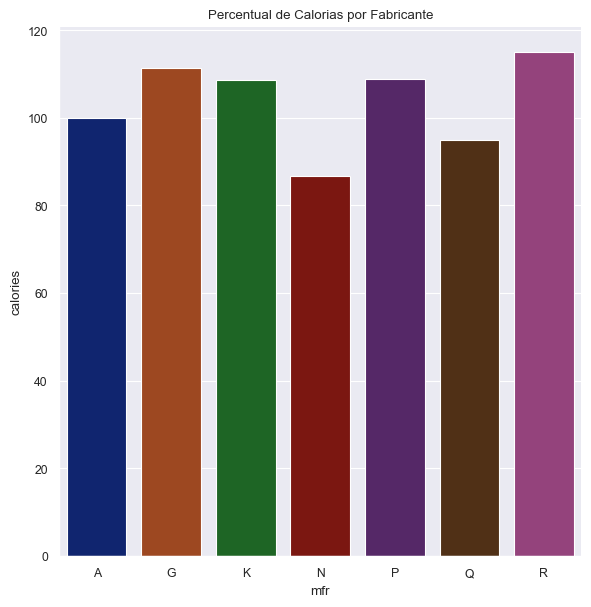

In [ ]:
grouped = pd.DataFrame(df.groupby('mfr')['calories'].mean())
sns.catplot(x='mfr', y='calories', data=grouped, hue='mfr', kind='bar', height=6, palette='dark', errorbar=None)
plt.title('Percentual de Calorias por Fabricante')

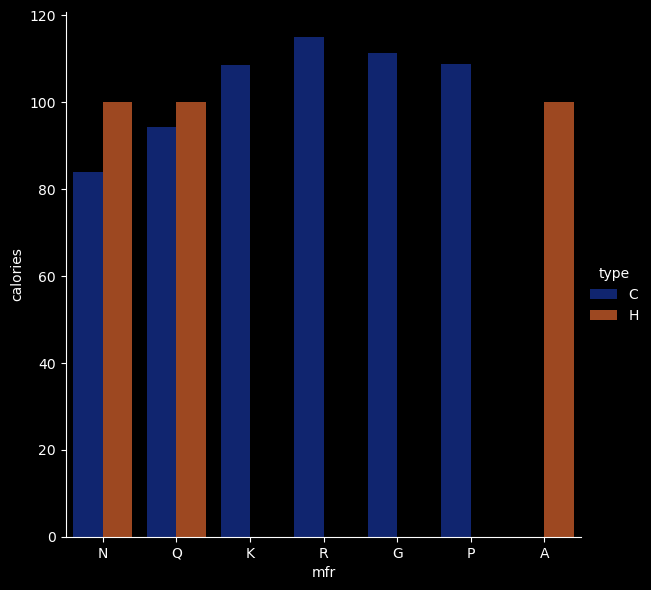

In [10]:
sns.catplot(x='mfr',
            y='calories',
            hue='type',
            data=df,
            height=6,
            kind='bar',
            palette='dark',
            errorbar=None)

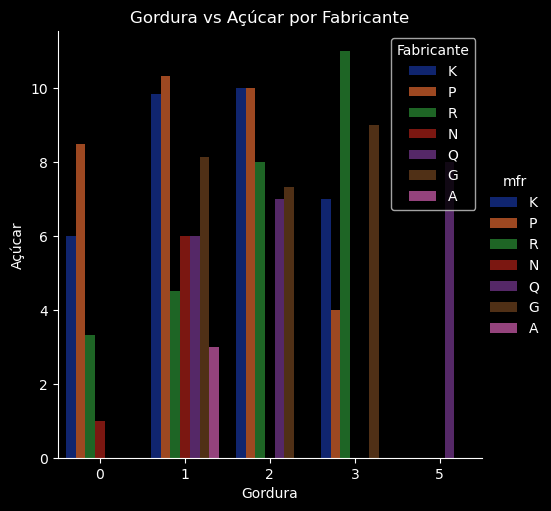

In [13]:
sns.catplot(x='fat',
            y='sugars',
            hue='mfr',
            data=df,
            kind='bar',
            palette='dark',
            errorbar=None)
plt.title('Gordura vs Açúcar por Fabricante')
plt.xlabel('Gordura')
plt.ylabel('Açúcar')
plt.legend(title='Fabricante')

In [ ]:
sns.set_context('paper')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [ ]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='survived'>

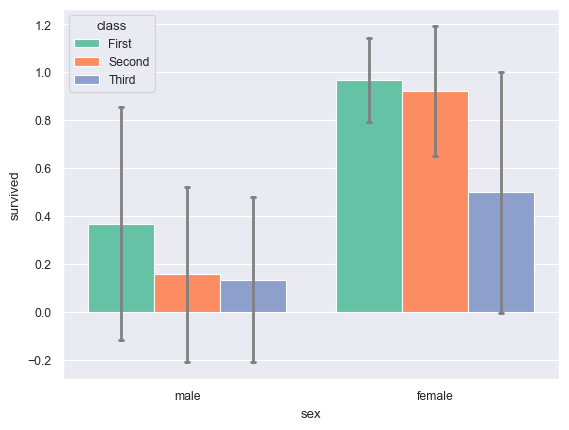

In [ ]:
sns.barplot(x='sex',
            y='survived',
            hue='class',
            data=df_titanic,
            palette='Set2',
            order=['male','female'],
            capsize=0.05,
            saturation=8,
            err_kws={'color': 'gray', 'linewidth': 2},
            errorbar='sd'
)

<Axes: xlabel='count', ylabel='class'>

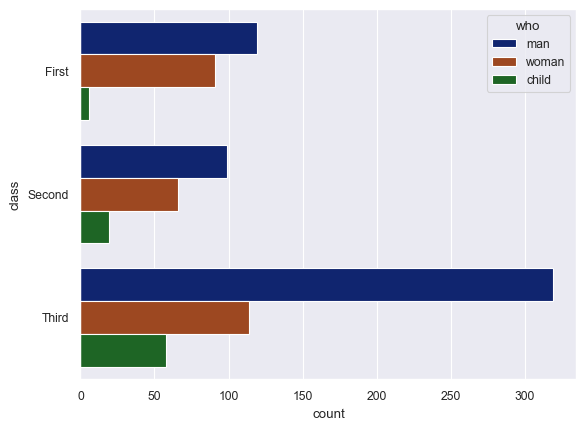

In [ ]:
sns.countplot(y='class', hue='who', data=df_titanic, palette='dark')

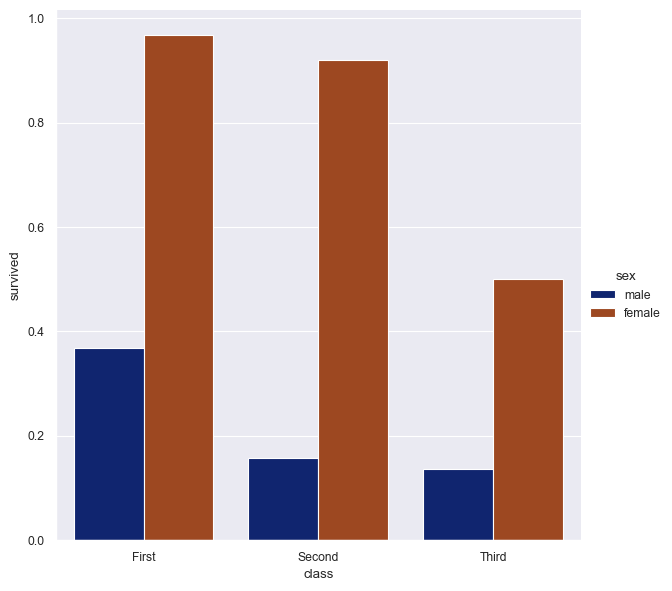

In [ ]:
sns.catplot(x='class',
            y='survived',
            hue='sex',
            data=df_titanic,
            height=6,
            kind='bar',
            palette='dark',
            errorbar=None)

In [ ]:
df_acidentes = sns.load_dataset('car_crashes').sort_values('total',ascending=False)
df_acidentes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


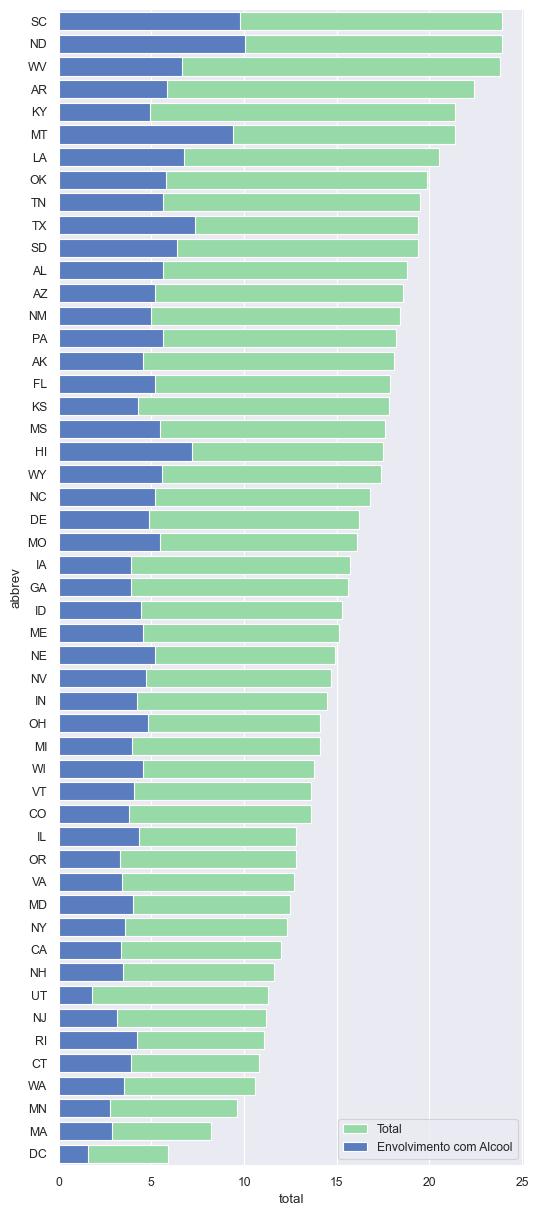

In [ ]:
ax = plt.subplots(figsize=(6,15))
sns.set_color_codes('pastel')
sns.barplot(x='total', y='abbrev', data=df_acidentes, label='Total', color='g', edgecolor='w')
sns.set_color_codes('muted')
sns.barplot(x='alcohol', y='abbrev', data=df_acidentes, label='Envolvimento com Alcool', color='b', edgecolor='w')
#
sns.despine(left=True, bottom=True)
plt.show()